# Profitable App Profiles for the Google Play Market
Our aim in this project is to find mobile app profiles that are profitable for Google Play markets. We're working as data analysts for a company that builds Android mobile apps, and our job is to enable our team of developers to make data-driven decisions with respect to the kind of apps they build.

At our company, we only build apps that are free to download and install, and our main source of revenue consists of in-app ads. This means that our revenue for any given app is mostly influenced by the number of users that use our app. Our goal for this project is to analyze data to help our developers understand what kinds of apps are likely to attract more users.

 - [A data set](https://www.kaggle.com/lava18/google-play-store-apps/home) containing data about approximately ten thousand Android apps from Google Play


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
app = pd.read_csv("googleplaystore.csv")

In [3]:
app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [4]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Remove incorrect data

In [5]:
app.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                          11-Feb-18
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [6]:
app.drop(10472, axis= 0, inplace = True)

In [7]:
app.iloc[10472]

App               osmino Wi-Fi: free WiFi
Category                            TOOLS
Rating                                4.2
Reviews                            134203
Size                                 4.1M
Installs                      10,000,000+
Type                                 Free
Price                                   0
Content Rating                   Everyone
Genres                              Tools
Last Updated                     7-Aug-18
Current Ver                       6.06.14
Android Ver                    4.4 and up
Name: 10473, dtype: object

## Extract Free app data

In [8]:
app["Type"].value_counts(dropna= False)

Free    10039
Paid      800
NaN         1
Name: Type, dtype: int64

In [9]:
app = app[app["Type"] == "Free"]

In [10]:
app.shape

(10039, 13)

## Remove duplicate data

In [11]:
app.duplicated(["App"]).sum()

1135

In [12]:
app["Reviews"] = app["Reviews"].astype(float)

In [13]:
app["Reviews"]

0           159.0
1           967.0
2         87510.0
3        215644.0
4           967.0
           ...   
10836        38.0
10837         4.0
10838         3.0
10839       114.0
10840    398307.0
Name: Reviews, Length: 10039, dtype: float64

In [14]:
app.sort_values("Reviews", ascending= False, inplace = True)

In [15]:
app.drop_duplicates(["App"], inplace= True)

In [16]:
app.shape

(8904, 13)

## Remove Non-English Apps

In [17]:
app["App"].sort_values().tail(20)

6006                          বাংলা টিভি প্রো BD Bangla TV
9200                                             বাংলাflix
1592                သိင်္ Astrology - Min Thein Kha BayDin
3960                          ► MultiCraft ― Free Miner! 👍
5569                              【Miku AR Camera】Mikuture
321      【Ranobbe complete free】 Novelba - Free app tha...
6418                                         あなカレ【BL】無料ゲーム
9466                       パーリーゲイツ公式通販｜EJ STYLE（イージェイスタイル）
5513                                           中国語 AQリスニング
1488     乐屋网: Buying a house, selling a house, renting ...
3824     乗換NAVITIME　Timetable & Route Search in Japan T...
10109                                              哈哈姆特不EY
5698                                                日本AV历史
313                    漫咖 Comics - Manga,Novel and Stories
9222                                    英漢字典 EC Dictionary
6420                                           감성학원 BL 첫사랑
6334                               뽕티비 - 개인방송, 인터넷방송, BJ

In [18]:
def english(app_name):
    non_eng = 0
    for i in app_name:
        if ord(i)>127:
            non_eng+=1
    if non_eng>3:
        return False
    else:
        return True

In [19]:
english("Facebリスニングook🔥")

False

In [20]:
english("Facebスニook🔥")

True

In [21]:
is_english = app["App"].apply(english)
is_english

2544    True
381     True
2604    True
382     True
1879    True
        ... 
2462    True
2461    True
2460    True
5270    True
7305    True
Name: App, Length: 8904, dtype: bool

In [22]:
app["App"].apply(english).sum()

8863

In [23]:
android_final = app[is_english].copy()

In [24]:
android_final.shape

(8863, 13)

### We are working on Free Apps data so remove unnecessary columns

In [25]:
android_final.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306.0,Varies with device,"1,000,000,000+",Free,0,Teen,Social,3-Aug-18,Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446.0,Varies with device,"1,000,000,000+",Free,0,Teen,Social,31-Jul-18,Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,1-Aug-18,Varies with device,Varies with device
1879,Clash of Clans,GAME,4.6,44893888.0,98M,"100,000,000+",Free,0,Everyone 10+,Strategy,15-Jul-18,10.322.16,4.1 and up


In [26]:
android_final.drop(["Type", "Price"], axis = 1, inplace = True)

In [27]:
 android_final.shape

(8863, 11)

### Check popularity of an app

In [28]:
android_final.head()

,App,Category,Rating,Reviews,Size,Installs,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306.0,Varies with device,"1,000,000,000+",Teen,Social,3-Aug-18,Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,"1,000,000,000+",Everyone,Communication,3-Aug-18,Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446.0,Varies with device,"1,000,000,000+",Teen,Social,31-Jul-18,Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578.0,Varies with device,"1,000,000,000+",Everyone,Communication,1-Aug-18,Varies with device,Varies with device
1879,Clash of Clans,GAME,4.6,44893888.0,98M,"100,000,000+",Everyone 10+,Strategy,15-Jul-18,10.322.16,4.1 and up


In [29]:
android_final["Installs"] = android_final["Installs"].str.replace(",","")\
.str.replace("+","").astype(int)

In [30]:
android_final["Category"].value_counts()

FAMILY                 1676
GAME                    862
TOOLS                   750
BUSINESS                407
LIFESTYLE               346
PRODUCTIVITY            345
FINANCE                 328
MEDICAL                 313
SPORTS                  301
PERSONALIZATION         294
COMMUNICATION           287
HEALTH_AND_FITNESS      273
PHOTOGRAPHY             261
NEWS_AND_MAGAZINES      248
SOCIAL                  236
TRAVEL_AND_LOCAL        207
SHOPPING                199
BOOKS_AND_REFERENCE     190
DATING                  165
VIDEO_PLAYERS           159
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          110
EDUCATION               102
ENTERTAINMENT            85
LIBRARIES_AND_DEMO       83
AUTO_AND_VEHICLES        82
HOUSE_AND_HOME           73
WEATHER                  71
EVENTS                   63
PARENTING                58
ART_AND_DESIGN           57
COMICS                   55
BEAUTY                   53
Name: Category, dtype: int64

In [31]:
len(android_final["Category"].unique())

33

In [32]:
cat = android_final["Category"].unique()

cat

array(['SOCIAL', 'COMMUNICATION', 'GAME', 'TOOLS', 'VIDEO_PLAYERS',
       'NEWS_AND_MAGAZINES', 'PHOTOGRAPHY', 'FAMILY', 'TRAVEL_AND_LOCAL',
       'PERSONALIZATION', 'MAPS_AND_NAVIGATION', 'SHOPPING',
       'ENTERTAINMENT', 'PRODUCTIVITY', 'HEALTH_AND_FITNESS', 'SPORTS',
       'BOOKS_AND_REFERENCE', 'LIFESTYLE', 'WEATHER', 'FINANCE',
       'BUSINESS', 'EDUCATION', 'FOOD_AND_DRINK', 'COMICS', 'PARENTING',
       'DATING', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'ART_AND_DESIGN',
       'AUTO_AND_VEHICLES', 'MEDICAL', 'BEAUTY', 'EVENTS'], dtype=object)

In [33]:
cat_means = android_final.groupby("Category")["Installs"].mean()

In [34]:
cat_means.head(5)

Category
ART_AND_DESIGN         1.986335e+06
AUTO_AND_VEHICLES      6.473178e+05
BEAUTY                 5.131519e+05
BOOKS_AND_REFERENCE    8.767812e+06
BUSINESS               1.712290e+06
Name: Installs, dtype: float64

In [35]:
sorted_cat = cat_means.sort_values(ascending = False)

In [36]:
sorted_cat.head(15)

Category
COMMUNICATION          3.845612e+07
VIDEO_PLAYERS          2.472787e+07
SOCIAL                 2.325365e+07
PHOTOGRAPHY            1.784011e+07
PRODUCTIVITY           1.678733e+07
GAME                   1.558802e+07
TRAVEL_AND_LOCAL       1.398408e+07
ENTERTAINMENT          1.164071e+07
TOOLS                  1.080139e+07
NEWS_AND_MAGAZINES     9.549178e+06
BOOKS_AND_REFERENCE    8.767812e+06
SHOPPING               7.036877e+06
PERSONALIZATION        5.201483e+06
WEATHER                5.074486e+06
HEALTH_AND_FITNESS     4.188822e+06
Name: Installs, dtype: float64

In [37]:
Category = pd.DataFrame(sorted_cat)

In [38]:
Category.head(5)

,Installs
Category,
COMMUNICATION,3.845612e+07
VIDEO_PLAYERS,2.472787e+07
SOCIAL,2.325365e+07
PHOTOGRAPHY,1.784011e+07
PRODUCTIVITY,1.678733e+07


In [39]:
cat_normalize = Category

In [40]:
for i in Category:
    cat_normalize[i] = cat_normalize[i] / cat_normalize[i].sum()

In [41]:
Category.reset_index(inplace = True)
Category.head()

,Category,Installs
0,COMMUNICATION,0.160034
1,VIDEO_PLAYERS,0.102904
2,SOCIAL,0.096770
3,PHOTOGRAPHY,0.074241
4,PRODUCTIVITY,0.069860


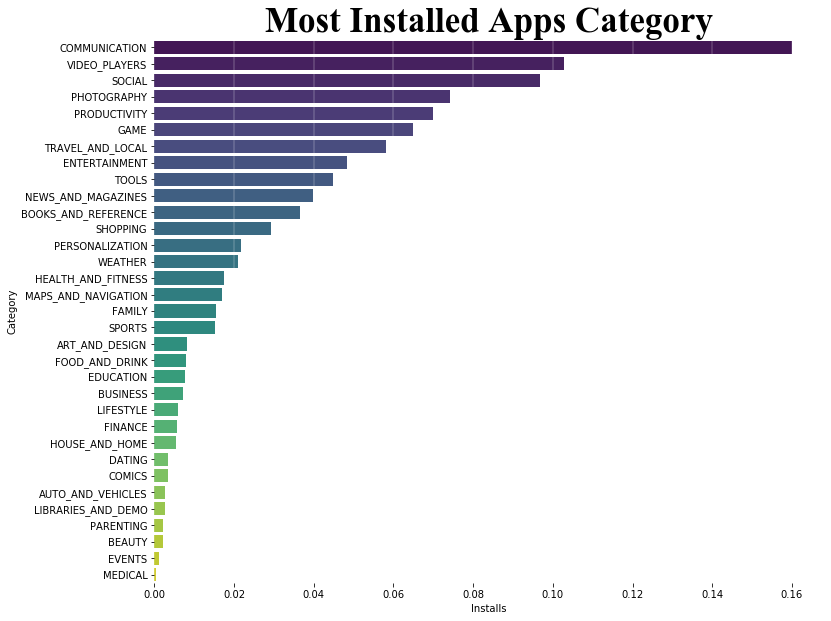

In [48]:
fig, ax = plt.subplots(figsize = (12, 10))


sns.barplot(x = "Installs", y = "Category",data = Category, palette="viridis",  )
plt.grid(axis = "x", color = "white", linewidth = 0.3)
ax.set_title("Most Installed Apps Category", loc = "center", fontdict= font)
font = {'family': 'Times New Roman', 'color':  'black', 'weight': 'bold', 'size': 35}

for value in ax.spines.values():
        value.set_visible(False)

plt.show()

In [53]:
com = android_final[android_final["Category"] == "COMMUNICATION"]

In [54]:
com[["App", "Installs"]].sort_values("Installs", ascending = False).head(15)

,App,Installs
381,WhatsApp Messenger,1000000000
391,Skype - free IM & video calls,1000000000
382,Messenger – Text and Video Chat for Free,1000000000
451,Gmail,1000000000
411,Google Chrome: Fast & Secure,1000000000
464,Hangouts,1000000000
403,LINE: Free Calls & Messages,500000000
4676,Viber Messenger,500000000
383,imo free video calls and chat,500000000
4039,Google Duo - High Quality Video Calls,500000000


In [ ]:
com[com["Installs"]< 100000000]["Installs"].mean()

### Conclusion
   - From the above analysis we conclude that, the most installed app categories are Communication, vedio players and social apps. And these app categories have a big competitor like whatsapp, Youtube, Facebook and instagram etc. So, to decide which app we should develop we should further do an analysis according to the business requirments. Or we should discuss with the top management as they know what kind of app will be possible for them to develop according to the needs of their business requriment and decision also rely on the budget constraints.